10 Вариант
![fsfd](./img.png)

In [42]:
from argparse import ArgumentError

import numpy as np
import matplotlib.pyplot as plt


def explicit(L, T, N, a, f_init, b_left, b_right, f_right):
    dx = L / N
    dt = dx ** 2 / 2 / a
    t_n = int(np.ceil(T / dt)) + 1
    dt = T / (t_n - 1)

    sigma = a * dt / dx ** 2

    x = np.arange(0, L + dx, dx)
    t = np.arange(0, T, dt)

    print(f'shape = {x.shape}')

    u = np.zeros((len(x), len(t)))

    u[:, 0] = f_init(x)
    u[0, :] = b_left(t)
    u[-1, :] = b_right(t)

    for n in range(len(t) - 1):
        for i in range(1, len(x) - 1):
            du_dx = (u[i + 1, n] - u[i - 1, n]) / 2 / dx
            d2u_dx2 = (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n]) / dx ** 2

            u[i, n + 1] = u[i, n] + dt * (a * d2u_dx2 + du_dx + f_right(x[i], t[n]))

        u[0, n + 1] = u[1, n + 1]  # dU/dx = 0 на левой границе
        u[-1, n + 1] = u[-2, n + 1]  # dU/dx = 0 на правой границе

    return x, t, u

shape = (11,)


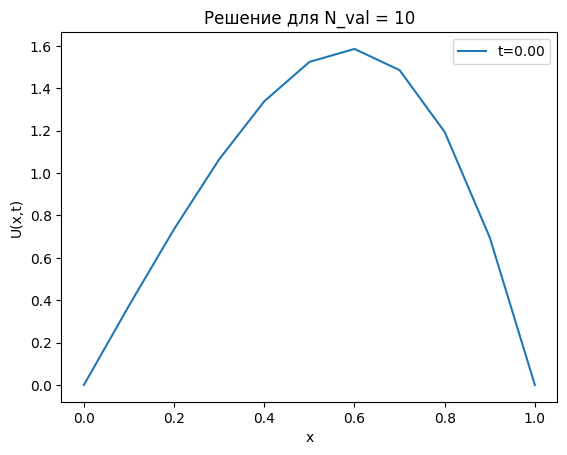

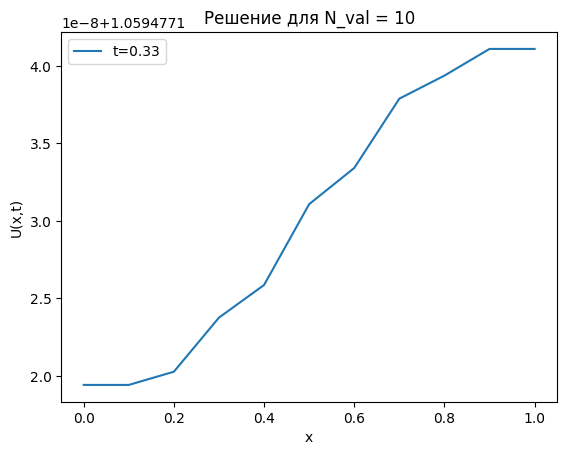

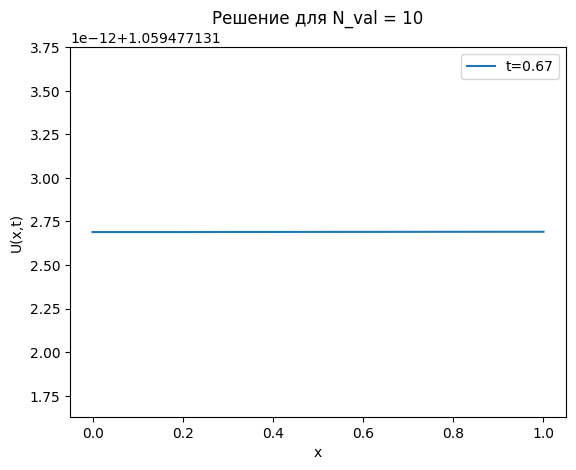

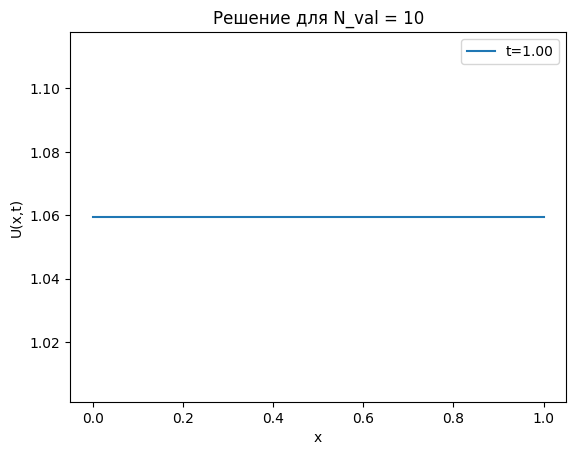

shape = (51,)


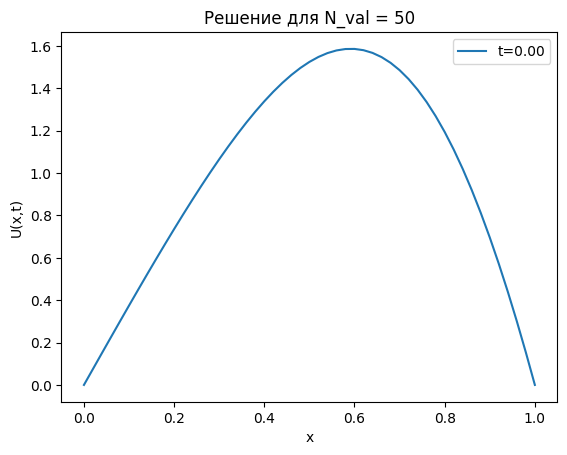

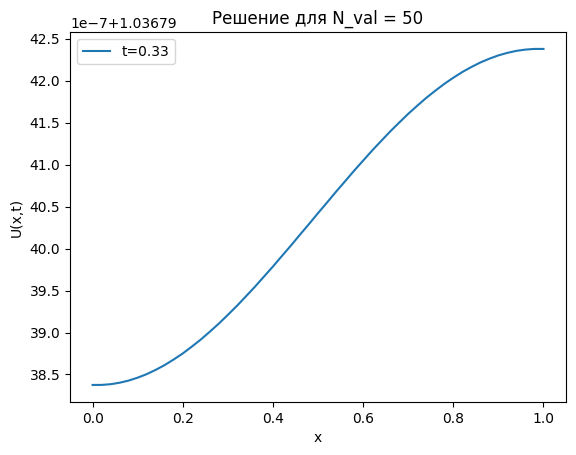

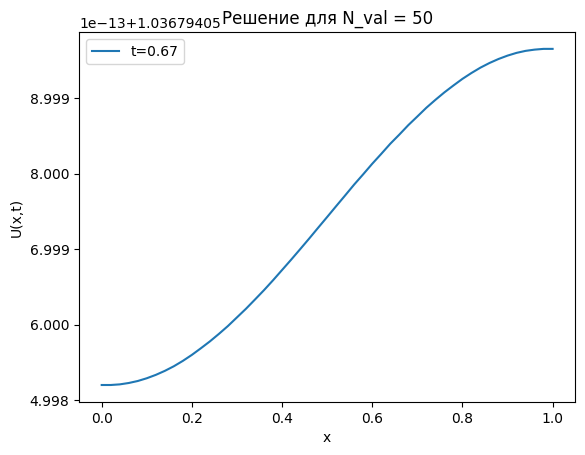

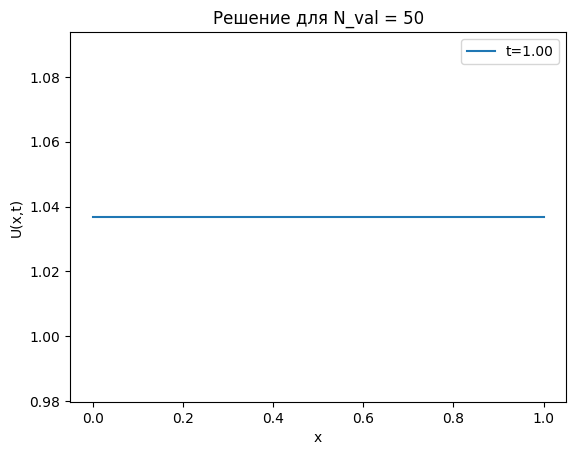

shape = (101,)


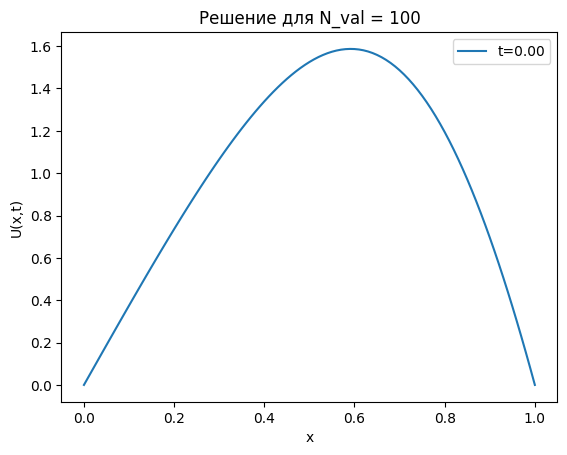

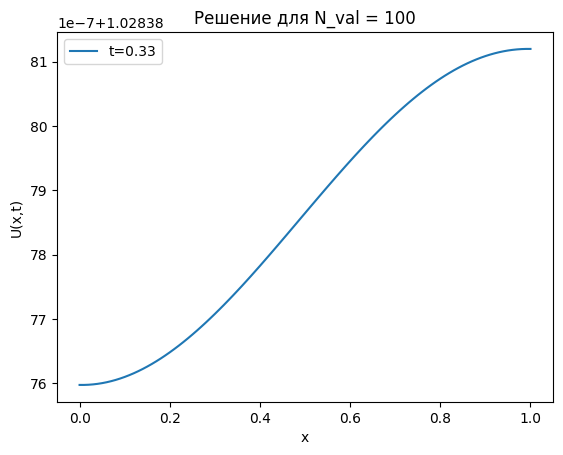

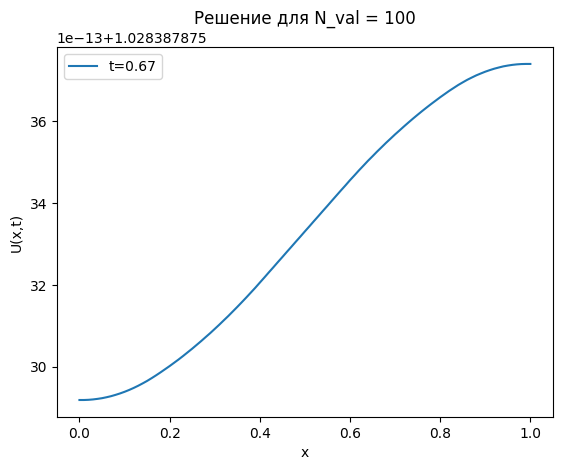

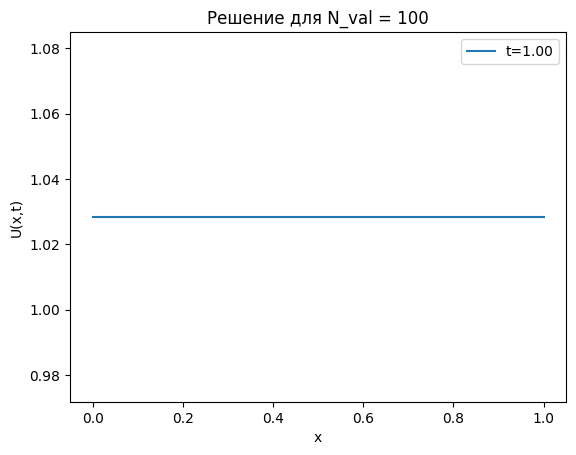

In [47]:
alpha = 4

N_vals = np.array([10, 50, 100])
T_val = 1.0
L_val = 1.0

f_init = lambda x: (1.3 * x ** 2 + 1.2) * np.sin(np.pi * x)
f_right = lambda x, t: 0
l_fun = lambda t: 0 * t
r_fun = lambda t: 0 * t

for i, n_i in enumerate(N_vals):
    x_val, t_val, u_val = explicit(L_val, T_val, n_i, alpha, f_init, l_fun, r_fun, f_right)

    for n in range(0, len(t_val), len(t_val) // 3):
        plt.plot(x_val, u_val[:, n], label=f't={t_val[n]:.2f}')
        plt.title(f'Решение для N_val = {n_i}')
        plt.xlabel('x')
        plt.ylabel('U(x,t)')
        plt.legend()
        plt.show()